# Open or Close Eye Detection

We can use this code for predecting if the eye if closed or open and also it can be used for mainly Driver Drowsiness Detection.



In [1]:

import cv2
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from tensorflow.python.client import device_lib
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
local_device_protos = device_lib.list_local_devices()
local_device_protos

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9371612121934815477
 xla_global_id: -1]

# Test whether the eye is closed or open

As the value ranges from 0 to 1, we the eye is detected as closed, then  the value will be nearer to zero. 
And if the eye is detected as open then it will be near to 1.

In [3]:
img_size = 224

new_model = tf.keras.models.load_model('my_new_model.h5')

img_array = cv2.imread('./input/s0001/s0001_02334_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

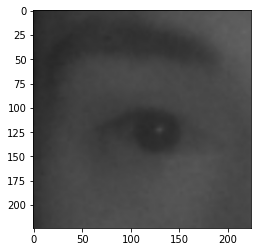

In [4]:
plt.imshow(new_array)

In [5]:
X_input = X_input/255.0

In [6]:
prediction = new_model.predict(X_input)
prediction

array([[6.31894e-08]], dtype=float32)

Since the eye is closed, we got the prediction value nearer to 0, i.e. 0.0000000008970.

In [31]:
img = cv2.imread('./test-images/2.jpg')

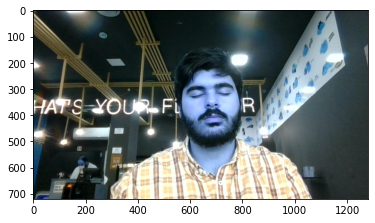

In [32]:
plt.imshow(img)

In [33]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [34]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [35]:
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [36]:
for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)

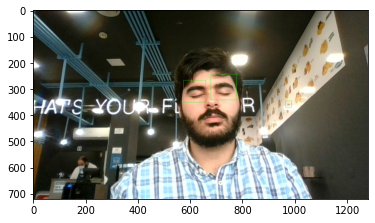

In [37]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [38]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y,w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]


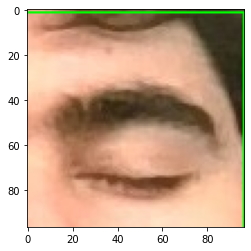

In [39]:
plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))

In [40]:
final_img = cv2.resize(roi_color, (224,224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0


In [41]:
new_model.predict(final_img)

array([[0.07831171]], dtype=float32)

Since the eye is open, we got the prediction value as 1.